In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("SalesDATA.csv")

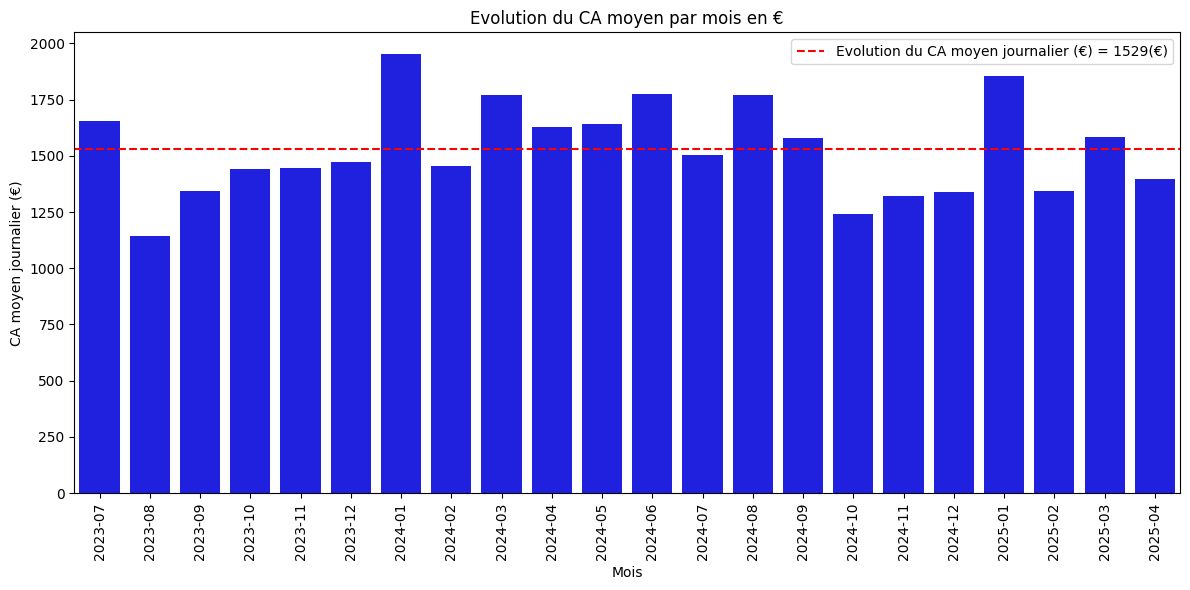

In [ ]:
#avg revenue per month 

#Ensure datetime format
df["Date"] = pd.to_datetime(df["Date"])

#Column for month and year
df["Mois_Annee"] = df["Date"].dt.strftime("%Y-%m")

#Group by month and year and calculate the mean
df_mensuelle = df.groupby("Mois_Annee")["CA"].mean().reset_index()

#plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_mensuelle, x="Mois_Annee", y="CA", color="blue")

#calculate the mean
moyenne = df_mensuelle["CA"].mean()

#Add horizontal line
plt.axhline(y=moyenne, color="red", linestyle="--", label="Evolution du CA moyen journalier (€) = " + str(int(moyenne)) +"(€)")

#parameters
plt.title("Evolution du CA moyen par mois en €")
plt.xlabel("Mois")
plt.ylabel("CA moyen journalier (€)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

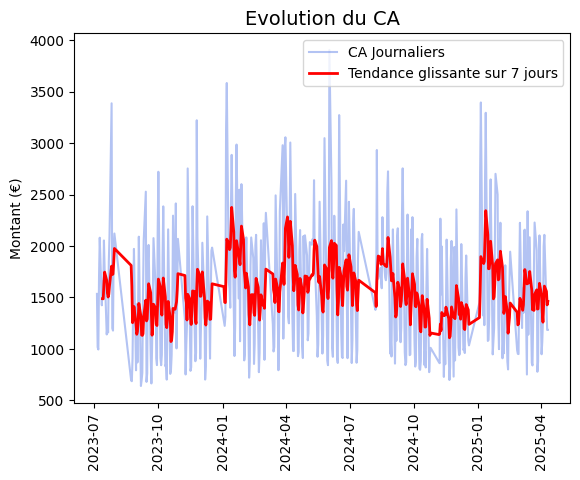

In [ ]:
#Revenue growth analysis

#load data
df["Date"] = pd.to_datetime(df["Date"])

#moving average (Trend)
df["CA_Lisse"] = df["CA"].rolling(window=7).mean()

#Daily revenue 
plt.plot(df["Date"], df["CA"], label="CA Journaliers", color="royalblue", alpha=0.4)

#Trend plot
plt.plot(df["Date"], df["CA_Lisse"], label="Tendance glissante sur 7 jours", color="red", linewidth=2)
plt.title("Evolution du CA", fontsize=14)
plt.ylabel("Montant (€)")
plt.xticks(rotation=90)
plt.legend()
plt.show()

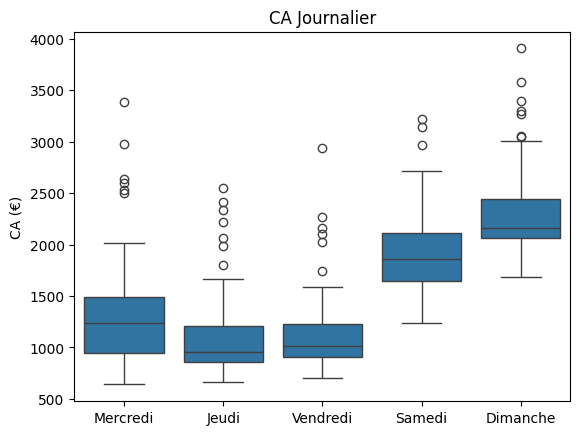

In [ ]:
#daily revenue analysis

#Label days
jours = {0: "Lundi", 1: "Mardi", 2: "Mercredi", 3: "Jeudi", 4: "Vendredi", 5: "Samedi", 6: "Dimanche"}
df["Nom_Jour"] = df["Jour_semaine"].map(jours)

#plot
sns.boxplot(data=df, x="Nom_Jour", y="CA")
plt.title("CA Journalier")
plt.ylabel("CA (€)")
plt.xlabel("")
plt.show()

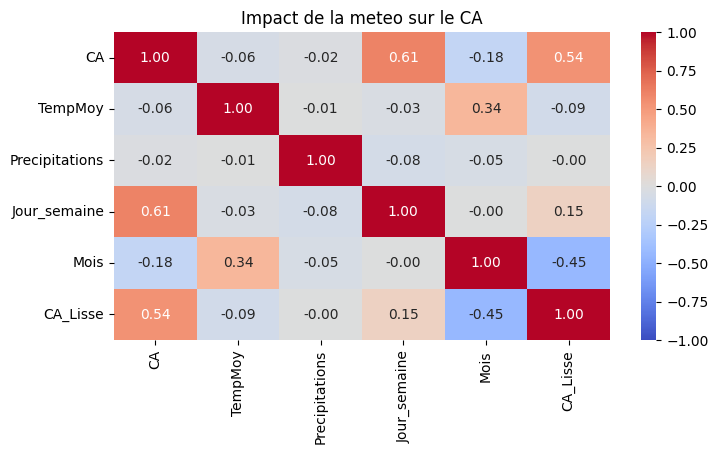

In [ ]:
#correlation matrix plot

plt.figure(figsize=(8, 4))

#correlation matrix (remove useless columns )
corr_matrix = df.drop(["Date", "Nb_Produit", "Nb_Clients", "Annee", "Mois_Annee","Nom_Jour"], axis=1).corr()

# heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Impact de la meteo sur le CA")
plt.show()

Pretty strong correlation between revenue and day of the week. No correlation between revenue and weather

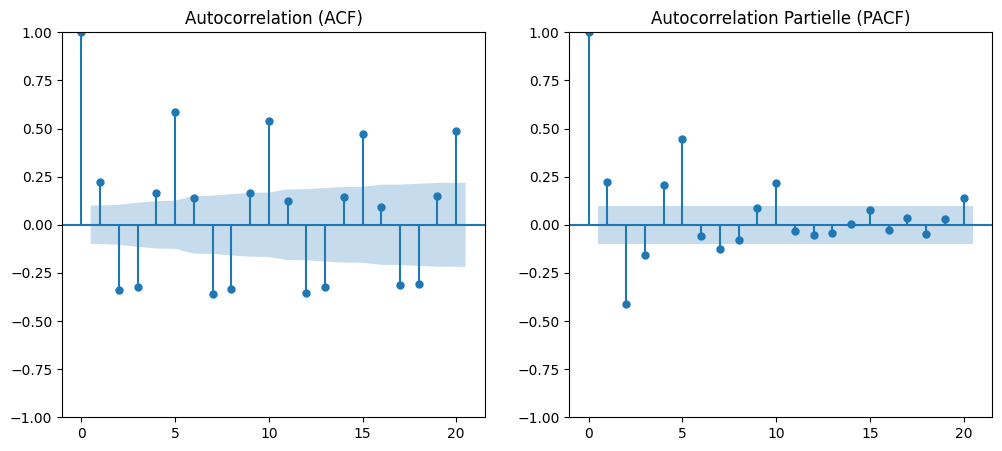

In [ ]:
#ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#ACF plot
plot_acf(df["CA"], lags=20, ax=ax[0], title="Autocorrelation (ACF)")

#PCAF plot
plot_pacf(df["CA"], lags=20, ax=ax[1], title="Autocorrelation Partielle (PACF)")
plt.show()

Lag of 5 which corresponds to weekly seasonality (2 closed days)